In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-tracking-germany/de_state.shp
/kaggle/input/covid19-tracking-germany/de_county.prj
/kaggle/input/covid19-tracking-germany/de_state.dbf
/kaggle/input/covid19-tracking-germany/de_state.cpg
/kaggle/input/covid19-tracking-germany/covid_de.csv
/kaggle/input/covid19-tracking-germany/de_county.cpg
/kaggle/input/covid19-tracking-germany/de_state.shx
/kaggle/input/covid19-tracking-germany/demographics_de.csv
/kaggle/input/covid19-tracking-germany/de_county.dbf
/kaggle/input/covid19-tracking-germany/de_county.shx
/kaggle/input/covid19-tracking-germany/de_state.prj
/kaggle/input/covid19-tracking-germany/de_county.shp


In [2]:
covid = pd.read_csv('/kaggle/input/covid19-tracking-germany/covid_de.csv')
covid.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [3]:
covid['date'] = pd.to_datetime(covid['date'], format = '%Y-%m-%d')
covid.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [4]:
covid_nds = covid[covid['state'] == 'Niedersachsen']
covid_nds.groupby('county')['cases'].count().reset_index()

,county,cases
0,LK Ammerland,663
1,LK Aurich,730
2,LK Celle,810
3,LK Cloppenburg,1178
4,LK Cuxhaven,808
5,LK Diepholz,1046
6,LK Emsland,1352
7,LK Friesland,468
8,LK Gifhorn,743
9,LK Goettingen,1273


In [5]:
covid_stade = covid[covid['county'] == 'LK Stade']
covid_stade.groupby('age_group')['cases'].sum()

age_group
00-04     59
05-14    157
15-34    663
35-59    766
60-79    264
80-99    184
Name: cases, dtype: int64

In [6]:
covid_stade.head()

,state,county,age_group,gender,date,cases,deaths,recovered
248998,Niedersachsen,LK Stade,00-04,F,2020-05-16,1,0,1
248999,Niedersachsen,LK Stade,00-04,F,2020-05-21,1,0,1
249000,Niedersachsen,LK Stade,00-04,F,2020-08-17,1,0,1
249001,Niedersachsen,LK Stade,00-04,F,2020-08-26,1,0,1
249002,Niedersachsen,LK Stade,00-04,F,2020-10-01,1,0,1


In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
covid_stade_cases = covid_stade.groupby('date')['cases'].sum().reset_index()
covid_stade_cases

,date,cases
0,2020-03-05,1
1,2020-03-06,1
2,2020-03-07,3
3,2020-03-10,6
4,2020-03-11,3
...,...,...
179,2020-12-31,7
180,2021-01-01,20
181,2021-01-02,1
182,2021-01-03,2


In [9]:
covid_stade_deaths = covid_stade.groupby('date')['deaths'].sum().reset_index()
covid_stade_deaths

,date,deaths
0,2020-03-05,0
1,2020-03-06,0
2,2020-03-07,0
3,2020-03-10,0
4,2020-03-11,0
...,...,...
179,2020-12-31,0
180,2021-01-01,0
181,2021-01-02,0
182,2021-01-03,0


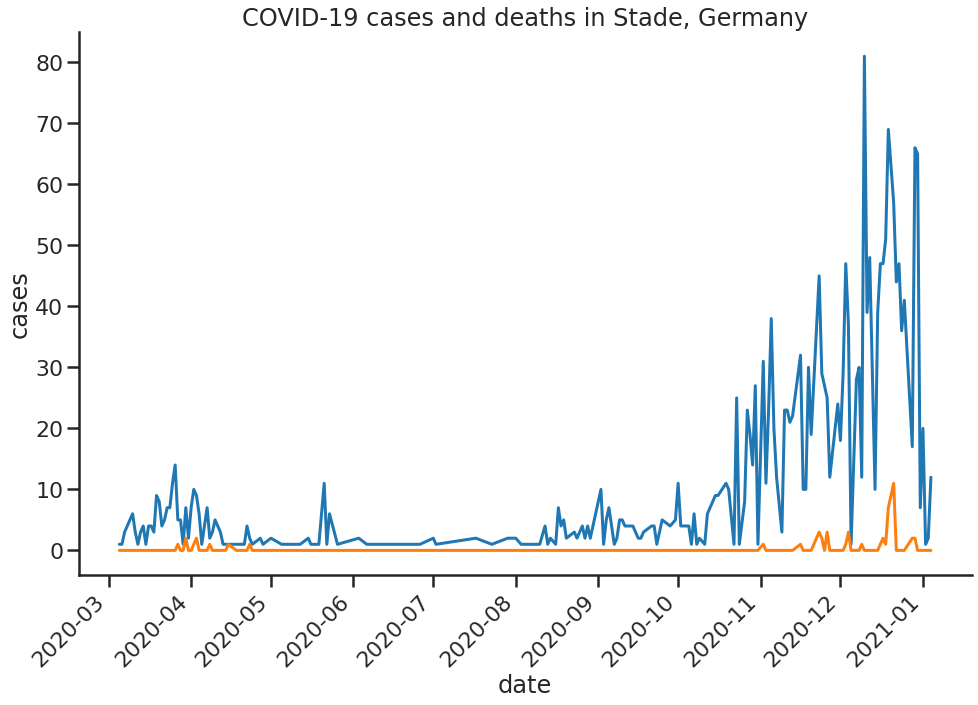

In [10]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
sns.set_context("poster")
ax = sns.lineplot(data=covid_stade_cases, x='date', y='cases', ci=None)
ax = sns.lineplot(data=covid_stade_deaths, x='date', y='deaths', ci=None)
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('cases')
plt.title('COVID-19 cases and deaths in Stade, Germany')
sns.despine()
plt.show()

In [11]:
covid_stade_by_age = covid_stade.groupby(['age_group', 'gender'])['cases'].sum().reset_index()
covid_stade_by_age['gender'] = covid_stade_by_age['gender'].replace(['F'],'Female').replace(['M'],'Male')
covid_stade_by_age

,age_group,gender,cases
0,00-04,Female,31
1,00-04,Male,28
2,05-14,Female,74
3,05-14,Male,83
4,15-34,Female,317
5,15-34,Male,344
6,35-59,Female,392
7,35-59,Male,372
8,60-79,Female,139
9,60-79,Male,123


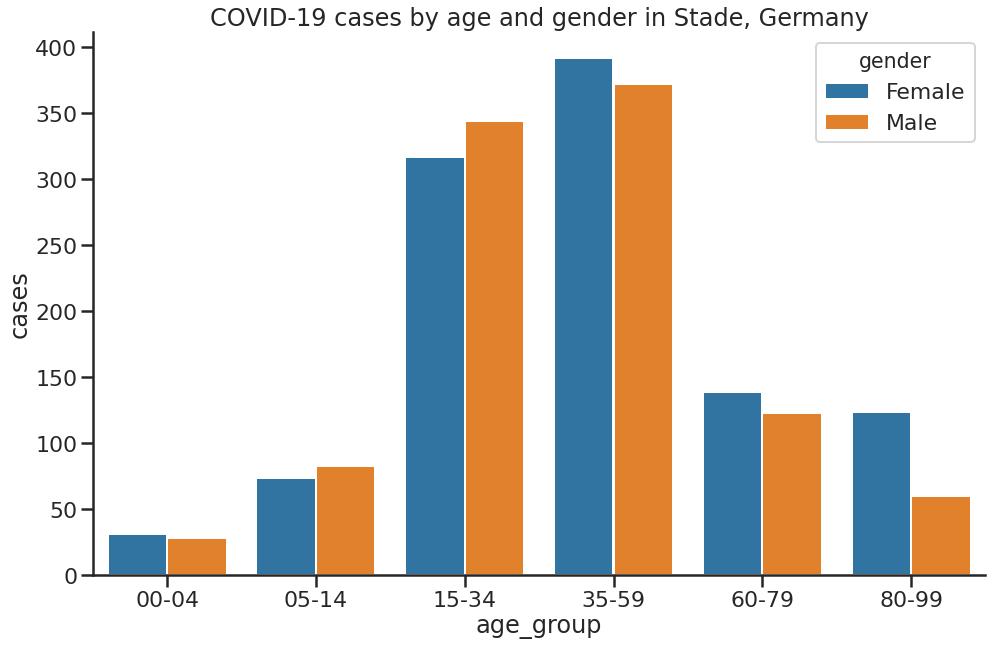

In [12]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
#sns.set_context("poster")
ax = sns.barplot(data=covid_stade_by_age, x='age_group', y='cases', hue='gender')
plt.title('COVID-19 cases by age and gender in Stade, Germany')
sns.despine()
plt.show()

In [13]:
covid_stade_death_by_age = covid_stade.groupby(['age_group', 'gender'])['deaths'].sum().reset_index()
covid_stade_death_by_age['gender'] = covid_stade_by_age['gender'].replace(['F'],'Female').replace(['M'],'Male')
covid_stade_death_by_age

,age_group,gender,deaths
0,00-04,Female,0
1,00-04,Male,0
2,05-14,Female,0
3,05-14,Male,0
4,15-34,Female,0
5,15-34,Male,0
6,35-59,Female,0
7,35-59,Male,1
8,60-79,Female,3
9,60-79,Male,8


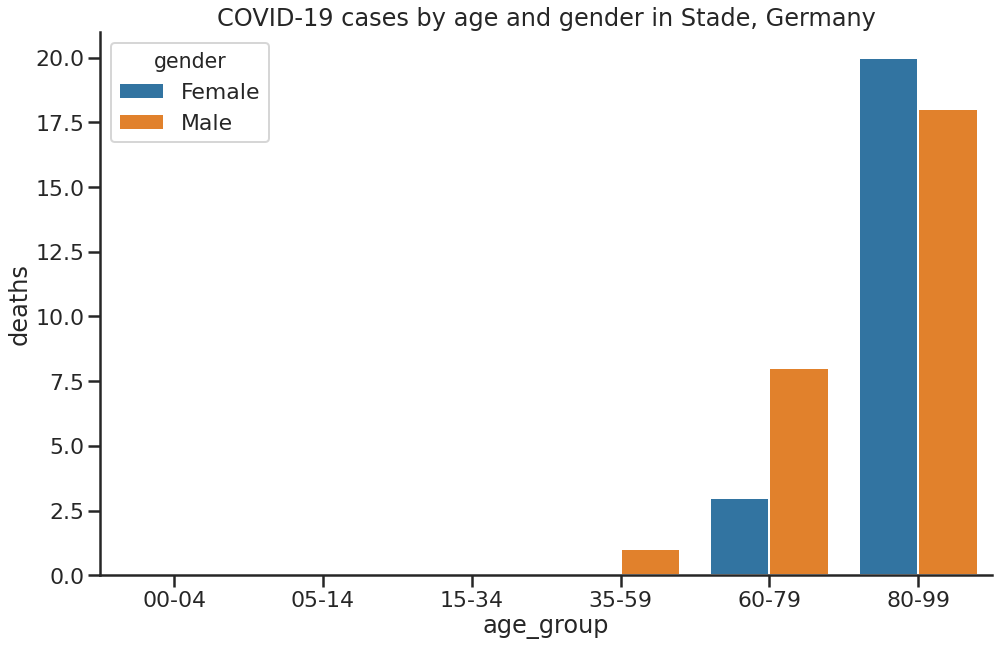

In [14]:
plt.figure(figsize=(16,10))
sns.set_style('ticks')
#sns.set_context("poster")
ax = sns.barplot(data=covid_stade_death_by_age, x='age_group', y='deaths', hue='gender')
plt.title('COVID-19 cases by age and gender in Stade, Germany')
sns.despine()
plt.show()